Status Code: 200
Phase 1 - Shapiro-Wilk Test: Statistics=0.9752675294876099, p-value=6.558424502145499e-05
Phase 1 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)
Phase 2 - Shapiro-Wilk Test: Statistics=0.9454063177108765, p-value=7.772620769230798e-09
Phase 2 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)
Phase 3 - Shapiro-Wilk Test: Statistics=0.877610445022583, p-value=2.5499037492496095e-14
Phase 3 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)
Phase 4 - Shapiro-Wilk Test: Statistics=0.7596415281295776, p-value=5.275246775094047e-20
Phase 4 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)
Phase 5 - Shapiro-Wilk Test: Statistics=0.6958383321762085, p-value=5.819519541640113e-22
Phase 5 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)
Phase 6 - Shapiro-Wilk Test: Statistics=0.6890777349472046, p-value=2.9554331259145724e-21
Phase 6 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)
Phase 7 - Shapiro-Wilk Test: Statistics=0.7081609964370728, p-value=1.4036687342329515e-18
Phase 7 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)
Phase 8 - Shapiro-Wilk Test: Statistics=0.720525324344635, p-value=3.064243466

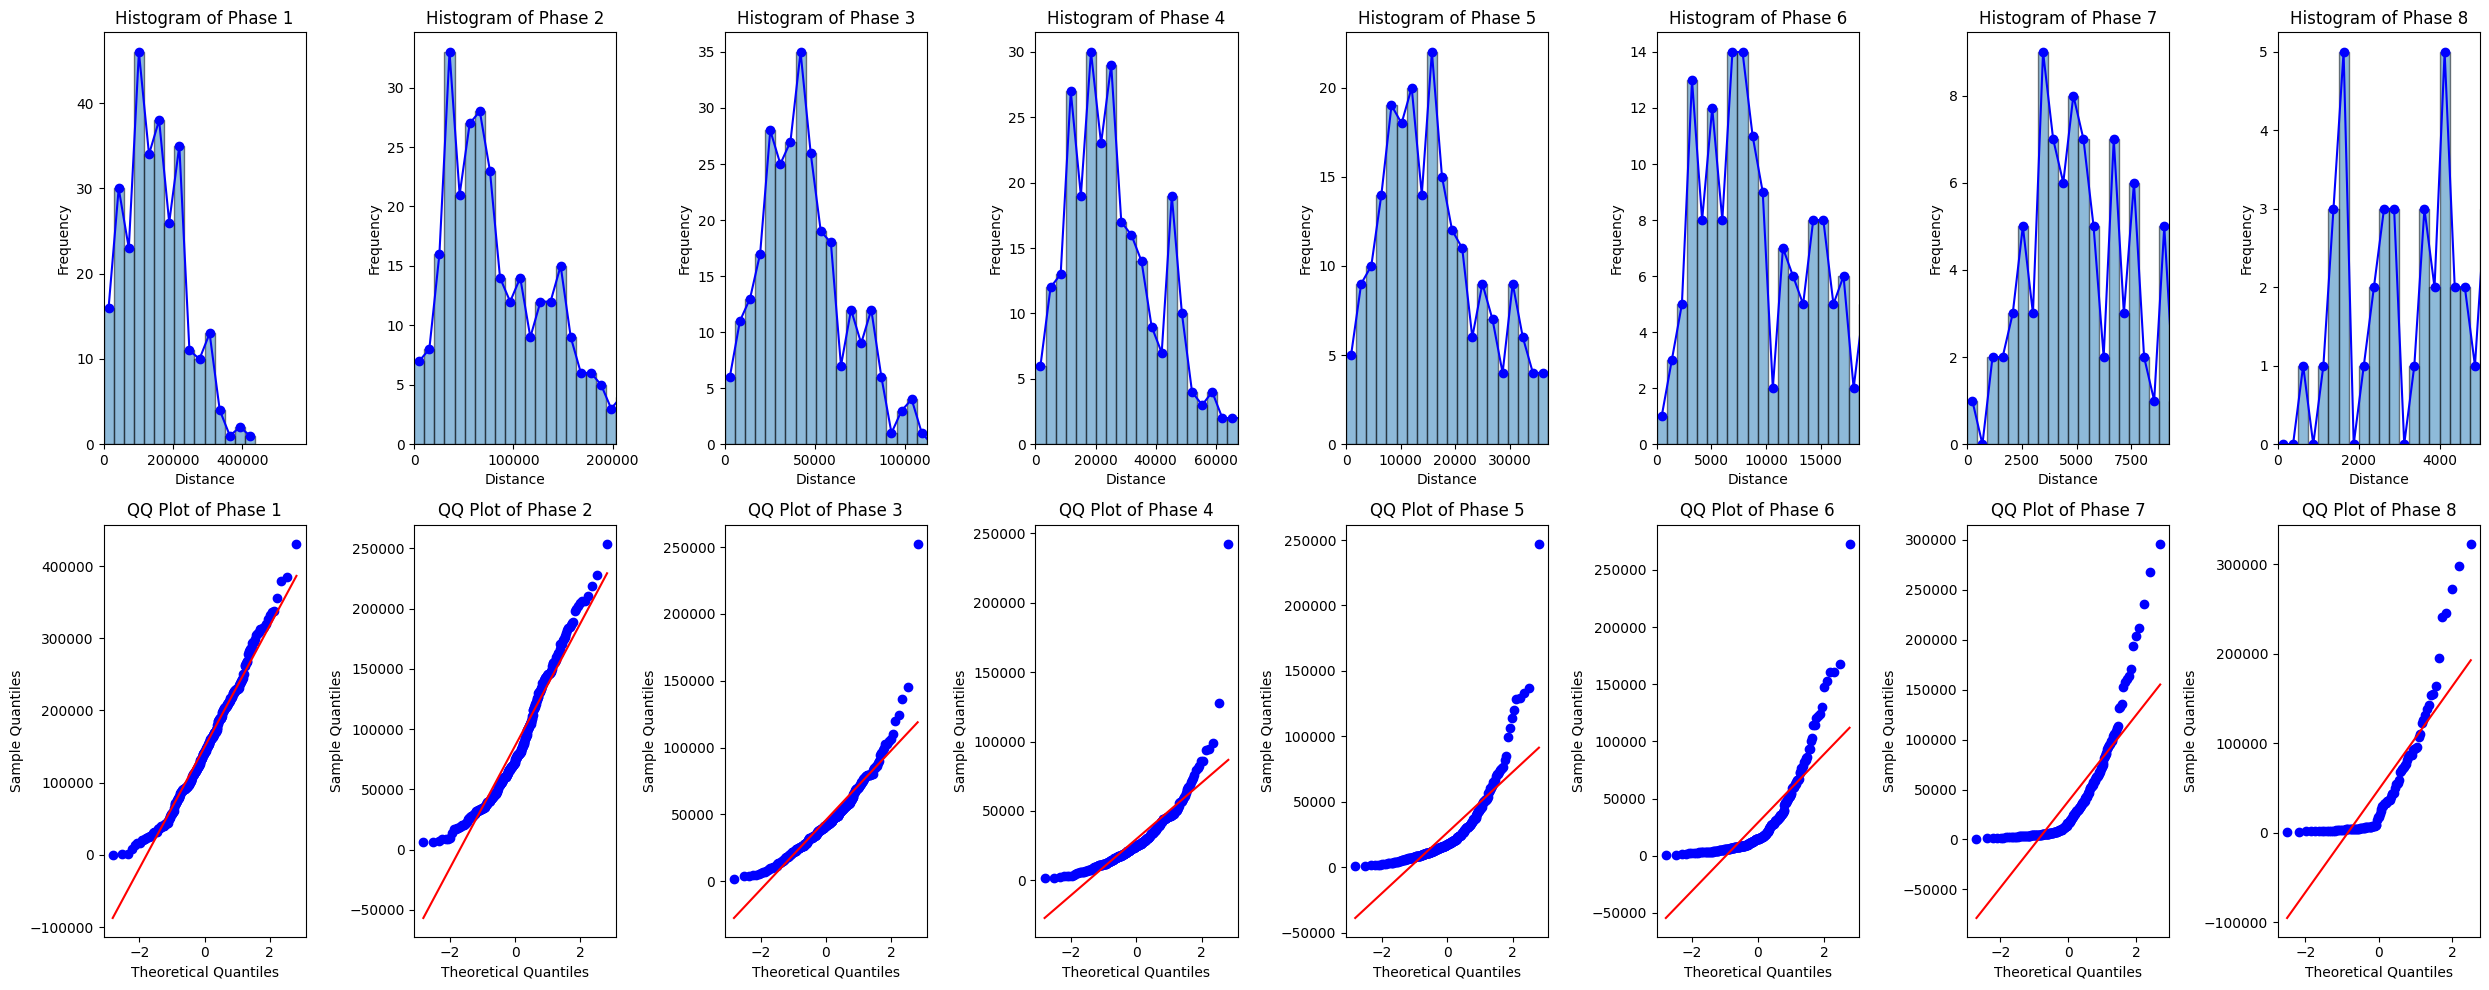

Phase 1 - 스피어만 상관분석: 상관계수=-0.017976104517213085, p-value=0.7604997850345642
Phase 2 - 스피어만 상관분석: 상관계수=-0.03327871315676194, p-value=0.574475614881715
Phase 3 - 스피어만 상관분석: 상관계수=0.03789287065788177, p-value=0.5240448931301587
Phase 4 - 스피어만 상관분석: 상관계수=0.037061136601454256, p-value=0.5353822567056491
Phase 5 - 스피어만 상관분석: 상관계수=0.029569554533058182, p-value=0.6260229679113829
Phase 6 - 스피어만 상관분석: 상관계수=0.07292733826598369, p-value=0.24966944460234575
Phase 7 - 스피어만 상관분석: 상관계수=0.06404371239789873, p-value=0.36399443879031557
Phase 8 - 스피어만 상관분석: 상관계수=0.08296770796770797, p-value=0.3866449029382739

- H0(귀무가설): 살아있는 유저들의 위치와 자기장 중심의 위치는 무관하다. 즉, 자기장은 무작위로 잡힌다.
- H1(대립가설): 살아있는 유저들의 위치가 자기장 중심의 위치에 영향을 미친다. 즉, 자기장은 살아있는 유저들의 위치를 고려하여 잡힌다.



In [3]:
import requests
import matplotlib.pyplot as plt
from scipy.stats import shapiro, spearmanr, probplot

# GET 요청을 보낼 기본 URL
base_url = 'http://192.168.0.79:5000'
endpoints = "/whitezoneAnalysis/phases"
header = {
    "Accept": "application/json"
}

# GET 요청 보내기
get_response = requests.get(url=base_url + endpoints, headers=header)

# 응답 상태 코드 확인
print('Status Code:', get_response.status_code)

# 응답 데이터 출력
if get_response.status_code == 200:
    data = get_response.json()
else:
    print('Failed to retrieve data')
    data = {}

# 거리 리스트 초기화
distance_list = []
phase_coordinates = []

for i in range(len(data)):
    phase_list = []
    coordinates_list = []
    phase_key = f"Phase{i+1}"
    if phase_key in data:
        for j in range(len(data[phase_key])):
            x1 = data[phase_key][j]["user_geometry_center_x"]
            x2 = data[phase_key][j]["white_zone_center_x"]
            y1 = data[phase_key][j]["user_geometry_center_y"]
            y2 = data[phase_key][j]["white_zone_center_y"]
            distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
            phase_list.append(distance)
            coordinates_list.append((x1, y1, x2, y2))
        distance_list.append(phase_list)  # 반복문 밖으로 이동
        phase_coordinates.append(coordinates_list)

# 각 페이즈별 x축 범위 설정
x_limits = [581999, 203699, 112034, 67220, 36971, 18485, 9242, 5000]

# 각 페이즈별로 샤피로-윌크 검정 수행 및 히스토그램 시각화
num_phases = len(distance_list)
fig, axes = plt.subplots(2, num_phases, figsize=(25, 10))

for i in range(num_phases):
    specific_phase = distance_list[i]
    
    # 샤피로-윌크 검정
    stat, p_value = shapiro(specific_phase)
    print(f'Phase {i+1} - Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')
    if p_value > 0.05:
        print(f'Phase {i+1} 데이터는 정규 분포를 따릅니다 (귀무가설 기각 실패)')
    else:
        print(f'Phase {i+1} 데이터는 정규 분포를 따르지 않습니다 (귀무가설 기각)')

    # 히스토그램 그리기
    bin_width = x_limits[i] / 20  # 구간을 20개로 나누기
    bins = range(0, int(max(specific_phase) + bin_width), int(bin_width))
    
    counts, bins, _ = axes[0, i].hist(specific_phase, bins=bins, edgecolor='black', alpha=0.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axes[0, i].plot(bin_centers, counts, linestyle='-', marker='o', color='blue')
    axes[0, i].set_title(f'Histogram of Phase {i+1}')
    axes[0, i].set_xlabel('Distance')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].set_xlim(0, x_limits[i])

    # QQ 플롯 생성
    probplot(specific_phase, dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'QQ Plot of Phase {i+1}')
    axes[1, i].set_xlabel('Theoretical Quantiles')
    axes[1, i].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

# 스피어만 상관분석
for i in range(len(distance_list)):
    specific_phase = distance_list[i]
    distances = list(range(len(specific_phase)))
    
    # 거리 데이터에 대한 스피어만 상관분석
    corr, p_value = spearmanr(distances, specific_phase)
    print(f'Phase {i+1} - 스피어만 상관분석: 상관계수={corr}, p-value={p_value}')

# 가설 설명
print("""
- H0(귀무가설): 살아있는 유저들의 위치와 자기장 중심의 위치는 무관하다. 즉, 자기장은 무작위로 잡힌다.
- H1(대립가설): 살아있는 유저들의 위치가 자기장 중심의 위치에 영향을 미친다. 즉, 자기장은 살아있는 유저들의 위치를 고려하여 잡힌다.
""")
